In [1]:
import torch
from torchvision import utils
import legacy
import dnnlib
import numpy as np
import os
from PIL import Image
from projector import run_projection
from training import networks

In [2]:
torch.__version__

'1.7.1+cu110'

In [3]:
# Cuda
device = torch.device('cuda')

In [4]:
# seed 지정
seed = 2022
np.random.seed(seed)
torch.manual_seed(seed)

In [5]:
network_pkl1 = '../model/lego256.pkl'
with dnnlib.util.open_url(network_pkl1) as fp:
        G1 = legacy.load_network_pkl(fp)['G_ema'].requires_grad_(False).to(device) # type: ignore

In [8]:
network_pkl2 = '../model/face256.pkl'
with dnnlib.util.open_url(network_pkl2) as fp2:
        G2 = legacy.load_network_pkl(fp2)['G_ema'].requires_grad_(False).to(device) # type: ignore

In [9]:
# network_pkl3 = '../model/face256.pkl'
# with dnnlib.util.open_url(network_pkl3) as fp3:
#         G3 = legacy.load_network_pkl(fp3)['G_ema'].requires_grad_(False).to(device) # type: ignore

In [6]:
G2.z_dim

NameError: name 'G2' is not defined

In [ ]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
import cv2 

z = torch.randn([1,512]).cuda()
c = None
w = G2.mapping(z, c, truncation_psi=0.5, truncation_cutoff=8)
img = G2.synthesis(w, noise_mode='const', force_fp32=True)
# img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)

# img = G2(z,c)
transform = T.ToPILImage()
tensor = img[0]
image = np.array(transform(tensor))
# # image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
Image.fromarray(image)

In [17]:
w.size()

torch.Size([1, 14, 512])

In [18]:
projected_w = run_projection(G = G2,
    target_fname = f'./freezeg_test/input/human4.jpg', #
    outdir = './output',
    save_video = False, #if Test Mode, Do not Save Video
    seed = 1111,#P
    num_steps = 1000,
    device = device)

Computing W midpoint and stddev using 10000 samples...
step    1/1000: dist 0.66 loss 16806.65
step    2/1000: dist 0.62 loss 14152.56
step    3/1000: dist 0.68 loss 13791.92
step    4/1000: dist 0.65 loss 13108.48
step    5/1000: dist 0.66 loss 12170.87
step    6/1000: dist 0.66 loss 11046.48
step    7/1000: dist 0.65 loss 9781.52
step    8/1000: dist 0.62 loss 8443.81
step    9/1000: dist 0.64 loss 7121.71
step   10/1000: dist 0.64 loss 5892.21
step   11/1000: dist 0.65 loss 4789.65
step   12/1000: dist 0.61 loss 3822.01
step   13/1000: dist 0.62 loss 3024.30
step   14/1000: dist 0.61 loss 2441.68
step   15/1000: dist 0.55 loss 2059.49
step   16/1000: dist 0.55 loss 1800.69
step   17/1000: dist 0.53 loss 1612.25
step   18/1000: dist 0.51 loss 1484.30
step   19/1000: dist 0.47 loss 1400.37
step   20/1000: dist 0.50 loss 1347.39
step   21/1000: dist 0.44 loss 1350.58
step   22/1000: dist 0.47 loss 1429.42
step   23/1000: dist 0.46 loss 1567.04
step   24/1000: dist 0.50 loss 1741.60
ste

step  221/1000: dist 0.22 loss 2.85 
step  222/1000: dist 0.23 loss 5.45 
step  223/1000: dist 0.22 loss 6.60 
step  224/1000: dist 0.21 loss 5.67 
step  225/1000: dist 0.22 loss 5.82 
step  226/1000: dist 0.21 loss 8.11 
step  227/1000: dist 0.21 loss 9.52 
step  228/1000: dist 0.21 loss 7.95 
step  229/1000: dist 0.21 loss 5.76 
step  230/1000: dist 0.22 loss 5.99 
step  231/1000: dist 0.20 loss 8.11 
step  232/1000: dist 0.21 loss 10.52
step  233/1000: dist 0.22 loss 12.68
step  234/1000: dist 0.21 loss 13.37
step  235/1000: dist 0.22 loss 10.83
step  236/1000: dist 0.21 loss 7.42 
step  237/1000: dist 0.22 loss 8.72 
step  238/1000: dist 0.21 loss 16.40
step  239/1000: dist 0.23 loss 24.01
step  240/1000: dist 0.23 loss 21.14
step  241/1000: dist 0.22 loss 9.20 
step  242/1000: dist 0.23 loss 4.18 
step  243/1000: dist 0.22 loss 10.20
step  244/1000: dist 0.22 loss 13.05
step  245/1000: dist 0.22 loss 6.61 
step  246/1000: dist 0.22 loss 3.51 
step  247/1000: dist 0.23 loss 7.67 
s

step  445/1000: dist 0.16 loss 7.42 
step  446/1000: dist 0.16 loss 5.78 
step  447/1000: dist 0.16 loss 4.98 
step  448/1000: dist 0.16 loss 7.47 
step  449/1000: dist 0.16 loss 6.61 
step  450/1000: dist 0.17 loss 5.80 
step  451/1000: dist 0.16 loss 11.69
step  452/1000: dist 0.16 loss 17.18
step  453/1000: dist 0.17 loss 18.38
step  454/1000: dist 0.16 loss 19.69
step  455/1000: dist 0.16 loss 15.94
step  456/1000: dist 0.16 loss 6.59 
step  457/1000: dist 0.16 loss 6.34 
step  458/1000: dist 0.17 loss 16.30
step  459/1000: dist 0.16 loss 20.50
step  460/1000: dist 0.16 loss 15.03
step  461/1000: dist 0.16 loss 9.76 
step  462/1000: dist 0.16 loss 7.78 
step  463/1000: dist 0.17 loss 6.17 
step  464/1000: dist 0.16 loss 5.06 
step  465/1000: dist 0.16 loss 6.77 
step  466/1000: dist 0.17 loss 10.27
step  467/1000: dist 0.16 loss 11.19
step  468/1000: dist 0.16 loss 10.42
step  469/1000: dist 0.16 loss 14.60
step  470/1000: dist 0.16 loss 21.75
step  471/1000: dist 0.16 loss 20.37
s

step  669/1000: dist 0.14 loss 0.74 
step  670/1000: dist 0.14 loss 0.85 
step  671/1000: dist 0.14 loss 0.84 
step  672/1000: dist 0.14 loss 0.83 
step  673/1000: dist 0.14 loss 0.73 
step  674/1000: dist 0.14 loss 0.53 
step  675/1000: dist 0.14 loss 0.50 
step  676/1000: dist 0.14 loss 0.86 
step  677/1000: dist 0.14 loss 1.38 
step  678/1000: dist 0.14 loss 1.84 
step  679/1000: dist 0.14 loss 2.82 
step  680/1000: dist 0.14 loss 5.38 
step  681/1000: dist 0.14 loss 10.06
step  682/1000: dist 0.14 loss 16.79
step  683/1000: dist 0.14 loss 23.06
step  684/1000: dist 0.14 loss 23.34
step  685/1000: dist 0.14 loss 13.02
step  686/1000: dist 0.14 loss 1.79 
step  687/1000: dist 0.14 loss 2.16 
step  688/1000: dist 0.14 loss 9.92 
step  689/1000: dist 0.14 loss 10.53
step  690/1000: dist 0.14 loss 2.77 
step  691/1000: dist 0.14 loss 0.73 
step  692/1000: dist 0.14 loss 6.02 
step  693/1000: dist 0.14 loss 6.10 
step  694/1000: dist 0.13 loss 1.03 
step  695/1000: dist 0.13 loss 1.38 
s

step  893/1000: dist 0.13 loss 0.13 
step  894/1000: dist 0.13 loss 0.13 
step  895/1000: dist 0.13 loss 0.13 
step  896/1000: dist 0.13 loss 0.13 
step  897/1000: dist 0.13 loss 0.13 
step  898/1000: dist 0.13 loss 0.13 
step  899/1000: dist 0.13 loss 0.13 
step  900/1000: dist 0.13 loss 0.13 
step  901/1000: dist 0.13 loss 0.13 
step  902/1000: dist 0.13 loss 0.13 
step  903/1000: dist 0.13 loss 0.13 
step  904/1000: dist 0.13 loss 0.13 
step  905/1000: dist 0.13 loss 0.13 
step  906/1000: dist 0.13 loss 0.13 
step  907/1000: dist 0.13 loss 0.13 
step  908/1000: dist 0.13 loss 0.13 
step  909/1000: dist 0.13 loss 0.13 
step  910/1000: dist 0.13 loss 0.13 
step  911/1000: dist 0.13 loss 0.13 
step  912/1000: dist 0.13 loss 0.13 
step  913/1000: dist 0.13 loss 0.13 
step  914/1000: dist 0.13 loss 0.13 
step  915/1000: dist 0.13 loss 0.13 
step  916/1000: dist 0.13 loss 0.13 
step  917/1000: dist 0.13 loss 0.13 
step  918/1000: dist 0.13 loss 0.13 
step  919/1000: dist 0.13 loss 0.13 
s

In [22]:
synth_image2 = G1.synthesis(w[0].unsqueeze(0), noise_mode='const')
synth_image2 = (synth_image2 + 1) * (255 / 2)
synth_image2 = synth_image2.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

In [20]:
synth_image2 = G1.synthesis(w[0].unsqueeze(0), noise_mode='const')
synth_image2 = (synth_image2 + 1) * (255 / 2)
synth_image2 = synth_image2.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

NameError: name 'synth_image' is not defined

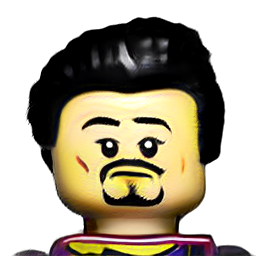

In [23]:
Image.fromarray(synth_image2)

In [179]:
synth_image = G1.synthesis(projected_w.unsqueeze(0), noise_mode='const')
synth_image = (synth_image + 1) * (255 / 2)
synth_image = synth_image.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

In [298]:
synth_image1 = G2.synthesis(projected_w.unsqueeze(0), noise_mode='const')
synth_image1 = (synth_image1 + 1) * (255 / 2)
synth_image1 = synth_image1.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()

In [ ]:
hello = torch.cat((projected_w[:7],projected_w[:7]), 0)

In [22]:
import os
import sys
import pickle
import math

import torch
import numpy as np
from torchvision import utils

from training.networks import Generator, Discriminator

In [251]:
target_fname = f'./freezeg_test/input/human2.jpg'
target_pil = Image.open(target_fname).convert('RGB')

In [253]:
w, h = target_pil.size
s = min(w, h)
target_pil = target_pil.crop(((w - s) // 2, (h - s) // 2, (w + s) // 2, (h + s) // 2))
target_pil = target_pil.resize((G2.img_resolution, G2.img_resolution), Image.LANCZOS)
target_uint8 = np.array(target_pil, dtype=np.uint8)

# Optimize projection.
target=torch.tensor(target_uint8.transpose([2, 0, 1]), device=device), # pylint: disable=not-callable

C:\Users\user\AppData\Local\Temp\ipykernel_11920\2441451521.py:4: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  target_pil = target_pil.resize((G2.img_resolution, G2.img_resolution), Image.LANCZOS)


In [295]:
target_uint8[0].size

array([[207, 207, 207],
       [207, 207, 207],
       [208, 208, 208],
       ...,
       [216, 216, 216],
       [215, 215, 215],
       [215, 215, 215]], dtype=uint8)

In [311]:
projected_w1 = run_projection(G = G1,
    target_fname = f'./freezeg_test/input/1.jpg', #
    outdir = './output',
    save_video = False, #if Test Mode, Do not Save Video
    seed = 1111,#P
    num_steps = 1000,
    device = device)

Computing W midpoint and stddev using 10000 samples...
step    1/1000: dist 0.60 loss 17788.49
step    2/1000: dist 0.61 loss 11323.65
step    3/1000: dist 0.63 loss 11076.83
step    4/1000: dist 0.59 loss 10602.33
step    5/1000: dist 0.66 loss 9947.72
step    6/1000: dist 0.62 loss 9158.50
step    7/1000: dist 0.65 loss 8267.91
step    8/1000: dist 0.53 loss 7320.50
step    9/1000: dist 0.57 loss 6385.10
step   10/1000: dist 0.56 loss 5500.99
step   11/1000: dist 0.56 loss 4677.15
step   12/1000: dist 0.61 loss 3890.22
step   13/1000: dist 0.58 loss 3142.13
step   14/1000: dist 0.57 loss 2468.14
step   15/1000: dist 0.59 loss 1892.79
step   16/1000: dist 0.45 loss 1419.77
step   17/1000: dist 0.55 loss 1066.70
step   18/1000: dist 0.60 loss 848.30
step   19/1000: dist 0.55 loss 741.65
step   20/1000: dist 0.48 loss 702.67
step   21/1000: dist 0.54 loss 718.89
step   22/1000: dist 0.53 loss 786.11
step   23/1000: dist 0.48 loss 903.20
step   24/1000: dist 0.43 loss 1079.42
step   25/1

step  219/1000: dist 0.30 loss 8.99 
step  220/1000: dist 0.25 loss 9.93 
step  221/1000: dist 0.23 loss 9.58 
step  222/1000: dist 0.24 loss 9.66 
step  223/1000: dist 0.24 loss 11.66
step  224/1000: dist 0.24 loss 16.72
step  225/1000: dist 0.23 loss 20.35
step  226/1000: dist 0.24 loss 16.93
step  227/1000: dist 0.24 loss 11.00
step  228/1000: dist 0.25 loss 11.30
step  229/1000: dist 0.23 loss 16.28
step  230/1000: dist 0.25 loss 17.91
step  231/1000: dist 0.26 loss 12.54
step  232/1000: dist 0.24 loss 5.17 
step  233/1000: dist 0.26 loss 3.58 
step  234/1000: dist 0.27 loss 6.29 
step  235/1000: dist 0.24 loss 6.83 
step  236/1000: dist 0.28 loss 6.02 
step  237/1000: dist 0.23 loss 7.05 
step  238/1000: dist 0.28 loss 7.34 
step  239/1000: dist 0.23 loss 5.85 
step  240/1000: dist 0.26 loss 9.10 
step  241/1000: dist 0.24 loss 19.58
step  242/1000: dist 0.23 loss 28.43
step  243/1000: dist 0.23 loss 21.87
step  244/1000: dist 0.27 loss 7.47 
step  245/1000: dist 0.24 loss 9.55 
s

step  441/1000: dist 0.20 loss 14.79
step  442/1000: dist 0.18 loss 5.04 
step  443/1000: dist 0.18 loss 3.85 
step  444/1000: dist 0.18 loss 9.62 
step  445/1000: dist 0.18 loss 9.08 
step  446/1000: dist 0.19 loss 4.36 
step  447/1000: dist 0.18 loss 5.36 
step  448/1000: dist 0.18 loss 8.68 
step  449/1000: dist 0.19 loss 8.97 
step  450/1000: dist 0.18 loss 10.65
step  451/1000: dist 0.18 loss 14.10
step  452/1000: dist 0.18 loss 14.69
step  453/1000: dist 0.18 loss 12.59
step  454/1000: dist 0.18 loss 8.27 
step  455/1000: dist 0.18 loss 2.58 
step  456/1000: dist 0.18 loss 2.03 
step  457/1000: dist 0.18 loss 6.76 
step  458/1000: dist 0.18 loss 8.36 
step  459/1000: dist 0.17 loss 6.32 
step  460/1000: dist 0.17 loss 6.67 
step  461/1000: dist 0.17 loss 10.47
step  462/1000: dist 0.17 loss 16.76
step  463/1000: dist 0.19 loss 23.40
step  464/1000: dist 0.17 loss 21.88
step  465/1000: dist 0.19 loss 10.86
step  466/1000: dist 0.17 loss 2.31 
step  467/1000: dist 0.17 loss 4.79 
s

step  664/1000: dist 0.14 loss 17.89
step  665/1000: dist 0.15 loss 14.07
step  666/1000: dist 0.14 loss 3.74 
step  667/1000: dist 0.15 loss 7.02 
step  668/1000: dist 0.14 loss 14.41
step  669/1000: dist 0.15 loss 7.36 
step  670/1000: dist 0.15 loss 1.39 
step  671/1000: dist 0.14 loss 7.59 
step  672/1000: dist 0.14 loss 8.86 
step  673/1000: dist 0.15 loss 3.38 
step  674/1000: dist 0.14 loss 4.67 
step  675/1000: dist 0.15 loss 8.43 
step  676/1000: dist 0.15 loss 8.73 
step  677/1000: dist 0.14 loss 11.64
step  678/1000: dist 0.15 loss 17.87
step  679/1000: dist 0.14 loss 23.93
step  680/1000: dist 0.15 loss 27.84
step  681/1000: dist 0.15 loss 23.89
step  682/1000: dist 0.15 loss 16.17
step  683/1000: dist 0.15 loss 13.92
step  684/1000: dist 0.15 loss 14.65
step  685/1000: dist 0.14 loss 13.79
step  686/1000: dist 0.15 loss 9.51 
step  687/1000: dist 0.15 loss 2.98 
step  688/1000: dist 0.14 loss 3.59 
step  689/1000: dist 0.15 loss 10.30
step  690/1000: dist 0.15 loss 9.75 
s

step  886/1000: dist 0.13 loss 0.13 
step  887/1000: dist 0.13 loss 0.13 
step  888/1000: dist 0.13 loss 0.13 
step  889/1000: dist 0.13 loss 0.13 
step  890/1000: dist 0.13 loss 0.13 
step  891/1000: dist 0.13 loss 0.13 
step  892/1000: dist 0.13 loss 0.13 
step  893/1000: dist 0.13 loss 0.13 
step  894/1000: dist 0.13 loss 0.13 
step  895/1000: dist 0.13 loss 0.13 
step  896/1000: dist 0.13 loss 0.13 
step  897/1000: dist 0.13 loss 0.13 
step  898/1000: dist 0.13 loss 0.13 
step  899/1000: dist 0.13 loss 0.13 
step  900/1000: dist 0.13 loss 0.13 
step  901/1000: dist 0.13 loss 0.13 
step  902/1000: dist 0.13 loss 0.13 
step  903/1000: dist 0.13 loss 0.13 
step  904/1000: dist 0.13 loss 0.13 
step  905/1000: dist 0.13 loss 0.13 
step  906/1000: dist 0.13 loss 0.13 
step  907/1000: dist 0.13 loss 0.13 
step  908/1000: dist 0.13 loss 0.13 
step  909/1000: dist 0.13 loss 0.13 
step  910/1000: dist 0.13 loss 0.13 
step  911/1000: dist 0.13 loss 0.13 
step  912/1000: dist 0.13 loss 0.13 
s

In [312]:
projected_w2 = run_projection(G = G1,
    target_fname = f'./freezeg_test/input/2.jpg', #
    outdir = './output',
    save_video = False, #if Test Mode, Do not Save Video
    seed = 1111,#P
    num_steps = 1000,
    device = device)

projected_w3 = run_projection(G = G1,
    target_fname = f'./freezeg_test/input/3.jpg', #
    outdir = './output',
    save_video = False, #if Test Mode, Do not Save Video
    seed = 1111,#P
    num_steps = 1000,
    device = device)

Computing W midpoint and stddev using 10000 samples...
step    1/1000: dist 0.68 loss 19611.79
step    2/1000: dist 0.65 loss 14893.07
step    3/1000: dist 0.66 loss 14534.46
step    4/1000: dist 0.74 loss 13853.19
step    5/1000: dist 0.64 loss 12905.21
step    6/1000: dist 0.71 loss 11749.06
step    7/1000: dist 0.63 loss 10453.46
step    8/1000: dist 0.65 loss 9099.54
step    9/1000: dist 0.71 loss 7780.86
step   10/1000: dist 0.66 loss 6568.88
step   11/1000: dist 0.63 loss 5514.05
step   12/1000: dist 0.66 loss 4654.66
step   13/1000: dist 0.64 loss 3993.64
step   14/1000: dist 0.61 loss 3506.54
step   15/1000: dist 0.64 loss 3148.77
step   16/1000: dist 0.65 loss 2874.25
step   17/1000: dist 0.59 loss 2653.09
step   18/1000: dist 0.61 loss 2448.81
step   19/1000: dist 0.64 loss 2233.76
step   20/1000: dist 0.59 loss 2018.07
step   21/1000: dist 0.60 loss 1811.05
step   22/1000: dist 0.61 loss 1620.01
step   23/1000: dist 0.60 loss 1462.97
step   24/1000: dist 0.59 loss 1388.86
st

step  219/1000: dist 0.46 loss 4.25 
step  220/1000: dist 0.47 loss 9.90 
step  221/1000: dist 0.48 loss 12.86
step  222/1000: dist 0.46 loss 7.47 
step  223/1000: dist 0.47 loss 3.74 
step  224/1000: dist 0.46 loss 6.99 
step  225/1000: dist 0.47 loss 8.22 
step  226/1000: dist 0.45 loss 3.94 
step  227/1000: dist 0.45 loss 3.56 
step  228/1000: dist 0.45 loss 6.88 
step  229/1000: dist 0.44 loss 5.56 
step  230/1000: dist 0.44 loss 4.01 
step  231/1000: dist 0.45 loss 8.03 
step  232/1000: dist 0.45 loss 11.60
step  233/1000: dist 0.45 loss 14.31
step  234/1000: dist 0.45 loss 22.47
step  235/1000: dist 0.44 loss 30.93
step  236/1000: dist 0.46 loss 30.83
step  237/1000: dist 0.45 loss 22.47
step  238/1000: dist 0.47 loss 13.42
step  239/1000: dist 0.46 loss 11.34
step  240/1000: dist 0.46 loss 17.81
step  241/1000: dist 0.45 loss 22.45
step  242/1000: dist 0.48 loss 16.06
step  243/1000: dist 0.47 loss 6.64 
step  244/1000: dist 0.46 loss 5.04 
step  245/1000: dist 0.45 loss 9.10 
s

step  442/1000: dist 0.39 loss 8.43 
step  443/1000: dist 0.39 loss 15.88
step  444/1000: dist 0.40 loss 21.21
step  445/1000: dist 0.39 loss 18.24
step  446/1000: dist 0.39 loss 14.78
step  447/1000: dist 0.39 loss 10.82
step  448/1000: dist 0.38 loss 9.07 
step  449/1000: dist 0.39 loss 14.96
step  450/1000: dist 0.40 loss 22.06
step  451/1000: dist 0.39 loss 27.36
step  452/1000: dist 0.39 loss 30.71
step  453/1000: dist 0.38 loss 21.16
step  454/1000: dist 0.38 loss 4.18 
step  455/1000: dist 0.38 loss 4.39 
step  456/1000: dist 0.39 loss 17.12
step  457/1000: dist 0.39 loss 16.80
step  458/1000: dist 0.39 loss 6.44 
step  459/1000: dist 0.39 loss 7.47 
step  460/1000: dist 0.39 loss 16.12
step  461/1000: dist 0.39 loss 15.55
step  462/1000: dist 0.38 loss 8.42 
step  463/1000: dist 0.39 loss 6.44 
step  464/1000: dist 0.39 loss 7.66 
step  465/1000: dist 0.38 loss 7.56 
step  466/1000: dist 0.38 loss 11.28
step  467/1000: dist 0.39 loss 19.71
step  468/1000: dist 0.40 loss 27.97
s

step  664/1000: dist 0.36 loss 4.69 
step  665/1000: dist 0.36 loss 3.56 
step  666/1000: dist 0.35 loss 2.33 
step  667/1000: dist 0.35 loss 3.45 
step  668/1000: dist 0.35 loss 5.72 
step  669/1000: dist 0.35 loss 7.02 
step  670/1000: dist 0.35 loss 8.47 
step  671/1000: dist 0.35 loss 12.56
step  672/1000: dist 0.35 loss 19.58
step  673/1000: dist 0.35 loss 27.23
step  674/1000: dist 0.35 loss 32.77
step  675/1000: dist 0.35 loss 31.67
step  676/1000: dist 0.35 loss 20.83
step  677/1000: dist 0.35 loss 6.17 
step  678/1000: dist 0.35 loss 3.83 
step  679/1000: dist 0.35 loss 13.59
step  680/1000: dist 0.35 loss 16.80
step  681/1000: dist 0.35 loss 6.93 
step  682/1000: dist 0.35 loss 1.23 
step  683/1000: dist 0.35 loss 7.39 
step  684/1000: dist 0.35 loss 9.95 
step  685/1000: dist 0.35 loss 4.46 
step  686/1000: dist 0.35 loss 4.04 
step  687/1000: dist 0.35 loss 8.21 
step  688/1000: dist 0.35 loss 8.41 
step  689/1000: dist 0.35 loss 11.42
step  690/1000: dist 0.35 loss 21.40
s

step  886/1000: dist 0.33 loss 0.33 
step  887/1000: dist 0.33 loss 0.33 
step  888/1000: dist 0.33 loss 0.33 
step  889/1000: dist 0.33 loss 0.33 
step  890/1000: dist 0.33 loss 0.33 
step  891/1000: dist 0.33 loss 0.33 
step  892/1000: dist 0.33 loss 0.33 
step  893/1000: dist 0.33 loss 0.33 
step  894/1000: dist 0.33 loss 0.33 
step  895/1000: dist 0.33 loss 0.33 
step  896/1000: dist 0.33 loss 0.33 
step  897/1000: dist 0.33 loss 0.33 
step  898/1000: dist 0.33 loss 0.33 
step  899/1000: dist 0.33 loss 0.33 
step  900/1000: dist 0.33 loss 0.33 
step  901/1000: dist 0.33 loss 0.33 
step  902/1000: dist 0.33 loss 0.33 
step  903/1000: dist 0.33 loss 0.33 
step  904/1000: dist 0.33 loss 0.33 
step  905/1000: dist 0.33 loss 0.33 
step  906/1000: dist 0.33 loss 0.33 
step  907/1000: dist 0.33 loss 0.33 
step  908/1000: dist 0.33 loss 0.33 
step  909/1000: dist 0.33 loss 0.33 
step  910/1000: dist 0.33 loss 0.33 
step  911/1000: dist 0.33 loss 0.33 
step  912/1000: dist 0.33 loss 0.33 
s

step  105/1000: dist 0.51 loss 6.43 
step  106/1000: dist 0.53 loss 7.19 
step  107/1000: dist 0.54 loss 11.12
step  108/1000: dist 0.53 loss 9.82 
step  109/1000: dist 0.52 loss 4.43 
step  110/1000: dist 0.52 loss 5.83 
step  111/1000: dist 0.52 loss 10.17
step  112/1000: dist 0.53 loss 10.99
step  113/1000: dist 0.57 loss 12.23
step  114/1000: dist 0.52 loss 14.37
step  115/1000: dist 0.53 loss 17.07
step  116/1000: dist 0.54 loss 18.34
step  117/1000: dist 0.51 loss 11.73
step  118/1000: dist 0.52 loss 7.83 
step  119/1000: dist 0.52 loss 13.87
step  120/1000: dist 0.54 loss 14.74
step  121/1000: dist 0.52 loss 7.22 
step  122/1000: dist 0.53 loss 8.58 
step  123/1000: dist 0.52 loss 14.59
step  124/1000: dist 0.54 loss 11.18
step  125/1000: dist 0.52 loss 6.54 
step  126/1000: dist 0.54 loss 6.83 
step  127/1000: dist 0.53 loss 4.97 
step  128/1000: dist 0.53 loss 4.77 
step  129/1000: dist 0.53 loss 8.42 
step  130/1000: dist 0.53 loss 6.84 
step  131/1000: dist 0.53 loss 3.32 
s

step  327/1000: dist 0.46 loss 19.18
step  328/1000: dist 0.46 loss 12.62
step  329/1000: dist 0.46 loss 14.72
step  330/1000: dist 0.46 loss 20.75
step  331/1000: dist 0.47 loss 17.07
step  332/1000: dist 0.46 loss 5.69 
step  333/1000: dist 0.45 loss 1.76 
step  334/1000: dist 0.46 loss 8.41 
step  335/1000: dist 0.47 loss 12.31
step  336/1000: dist 0.45 loss 6.75 
step  337/1000: dist 0.45 loss 1.76 
step  338/1000: dist 0.45 loss 4.22 
step  339/1000: dist 0.45 loss 6.98 
step  340/1000: dist 0.45 loss 4.69 
step  341/1000: dist 0.46 loss 2.30 
step  342/1000: dist 0.46 loss 3.27 
step  343/1000: dist 0.46 loss 4.12 
step  344/1000: dist 0.46 loss 3.18 
step  345/1000: dist 0.45 loss 2.80 
step  346/1000: dist 0.45 loss 3.51 
step  347/1000: dist 0.45 loss 4.36 
step  348/1000: dist 0.45 loss 5.83 
step  349/1000: dist 0.46 loss 8.31 
step  350/1000: dist 0.45 loss 11.36
step  351/1000: dist 0.45 loss 14.23
step  352/1000: dist 0.45 loss 13.83
step  353/1000: dist 0.45 loss 8.14 
s

step  550/1000: dist 0.41 loss 7.87 
step  551/1000: dist 0.41 loss 3.02 
step  552/1000: dist 0.41 loss 1.84 
step  553/1000: dist 0.41 loss 5.12 
step  554/1000: dist 0.41 loss 7.65 
step  555/1000: dist 0.41 loss 6.92 
step  556/1000: dist 0.41 loss 5.78 
step  557/1000: dist 0.41 loss 7.76 
step  558/1000: dist 0.41 loss 13.57
step  559/1000: dist 0.41 loss 19.50
step  560/1000: dist 0.41 loss 20.22
step  561/1000: dist 0.41 loss 15.04
step  562/1000: dist 0.41 loss 10.24
step  563/1000: dist 0.41 loss 11.74
step  564/1000: dist 0.41 loss 19.51
step  565/1000: dist 0.41 loss 27.47
step  566/1000: dist 0.41 loss 26.23
step  567/1000: dist 0.41 loss 13.39
step  568/1000: dist 0.41 loss 2.38 
step  569/1000: dist 0.40 loss 5.14 
step  570/1000: dist 0.40 loss 13.48
step  571/1000: dist 0.41 loss 12.27
step  572/1000: dist 0.41 loss 3.52 
step  573/1000: dist 0.41 loss 1.85 
step  574/1000: dist 0.41 loss 7.75 
step  575/1000: dist 0.41 loss 8.35 
step  576/1000: dist 0.41 loss 2.84 
s

step  772/1000: dist 0.38 loss 19.61
step  773/1000: dist 0.38 loss 23.77
step  774/1000: dist 0.38 loss 23.96
step  775/1000: dist 0.38 loss 25.02
step  776/1000: dist 0.38 loss 16.79
step  777/1000: dist 0.38 loss 7.30 
step  778/1000: dist 0.38 loss 7.57 
step  779/1000: dist 0.38 loss 9.68 
step  780/1000: dist 0.38 loss 13.14
step  781/1000: dist 0.38 loss 13.44
step  782/1000: dist 0.38 loss 8.40 
step  783/1000: dist 0.38 loss 5.30 
step  784/1000: dist 0.38 loss 4.40 
step  785/1000: dist 0.38 loss 5.59 
step  786/1000: dist 0.38 loss 5.55 
step  787/1000: dist 0.38 loss 3.57 
step  788/1000: dist 0.38 loss 3.58 
step  789/1000: dist 0.38 loss 3.19 
step  790/1000: dist 0.38 loss 2.84 
step  791/1000: dist 0.38 loss 2.63 
step  792/1000: dist 0.38 loss 1.85 
step  793/1000: dist 0.38 loss 2.27 
step  794/1000: dist 0.38 loss 2.23 
step  795/1000: dist 0.38 loss 1.91 
step  796/1000: dist 0.38 loss 1.69 
step  797/1000: dist 0.38 loss 1.17 
step  798/1000: dist 0.38 loss 1.08 
s

step  995/1000: dist 0.37 loss 0.37 
step  996/1000: dist 0.37 loss 0.37 
step  997/1000: dist 0.37 loss 0.37 
step  998/1000: dist 0.37 loss 0.37 
step  999/1000: dist 0.37 loss 0.37 
step 1000/1000: dist 0.37 loss 0.37 
Elapsed: 110.8 s
3


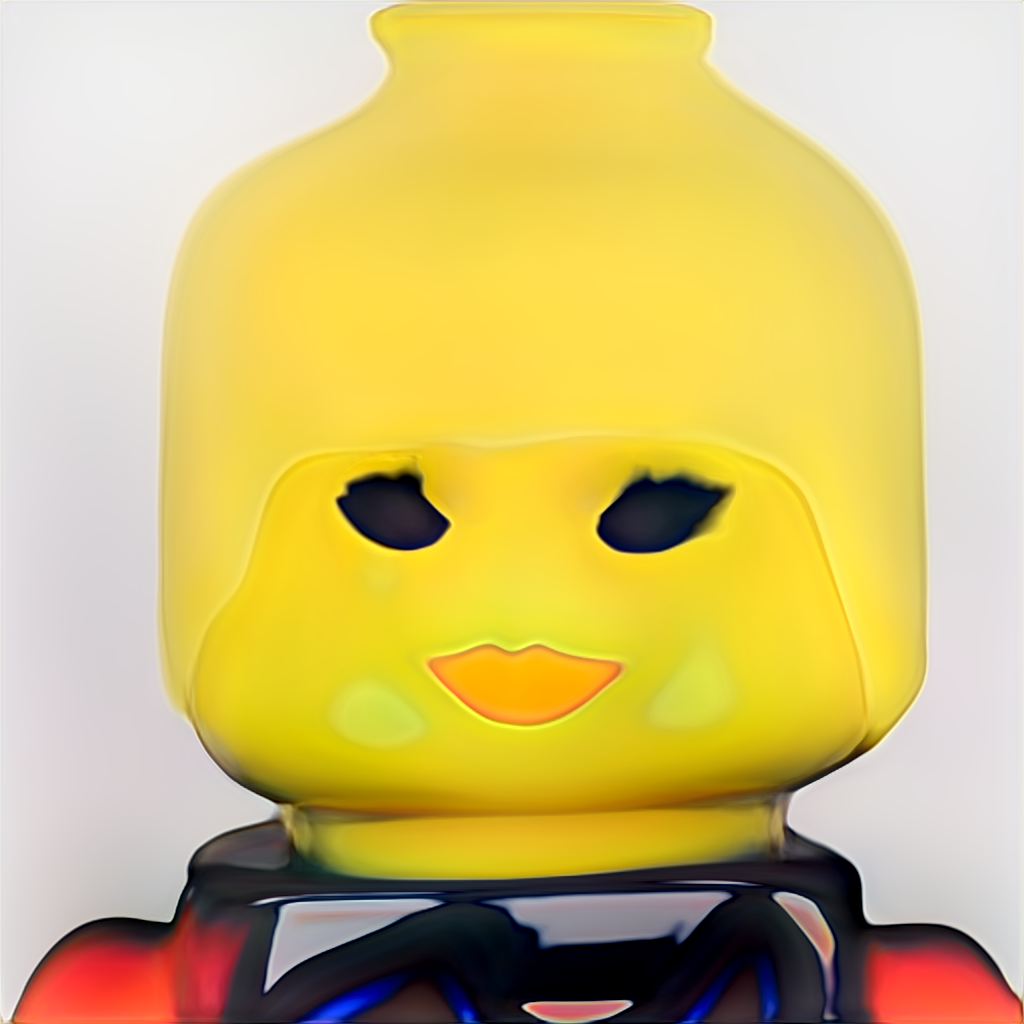

In [333]:
synth_image1 = G1.synthesis(projected_w3.unsqueeze(0), noise_mode='none')
synth_image1 = (synth_image1 + 1) * (255 / 2)
synth_image1 = synth_image1.permute(0, 2, 3, 1).clamp(0, 255).to(torch.uint8)[0].cpu().numpy()
Image.fromarray(synth_image1)

In [324]:
synth_image1.shape

(1024, 1024, 3)